# Load raw X-mode swept reflectometry data

In [1]:
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import skreflectometry
# from skreflectometry import data
%matplotlib inline

In [2]:
# Loading data
data = skreflectometry.data.raw_xmode()
frequency = data['frequency']
signal = data['signal']
dfdt = data['dfdt']
fs = data['sampling_frequency']


## Plotting the raw data

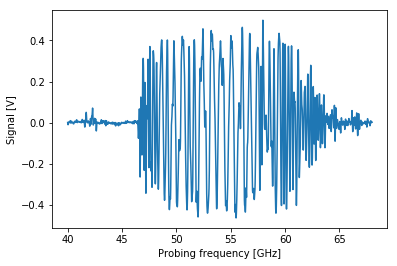

In [8]:

plt.plot(frequency*1e-9, signal.real, label='Real')
plt.xlabel('Probing frequency [GHz]')
plt.ylabel('Signal [V]')


## Plotting the spectrogram data

(0, 10)

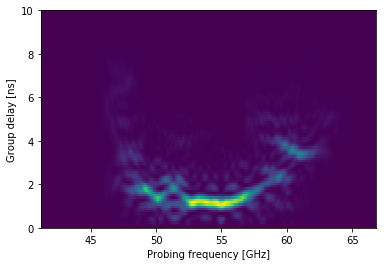

In [22]:
probing_frequency, beat_frequency, power = skreflectometry.sweep_spectrum(frequency, signal, fs,
                                                      nperseg=256,noverlap=250,nfft=1024)
group_delay = skreflectometry.sweep_delay(beat_frequency,dfdt)

plt.pcolormesh(probing_frequency*1e-9, group_delay*1e9, power)
plt.xlabel('Probing frequency [GHz]')
plt.ylabel('Group delay [ns]')
plt.ylim(0,10)